In [92]:
#Basic and most important libraries
import pandas as pd , numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from collections import Counter
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly

#Classifiers
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Model evaluation tools
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import cross_val_score

#Data processing functions

from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")



In [93]:
df=pd.read_csv("Fraud.csv")

In [94]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 100

In [95]:
df.head(510)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.00,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.00,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0,0


In [96]:
df.shape

(6362620, 11)

In [97]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [98]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [99]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [100]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [101]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

# Visualization

In [102]:
type = df["type"].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(df, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Distribution of Transaction Type")
figure.show()


<AxesSubplot:xlabel='type', ylabel='count'>

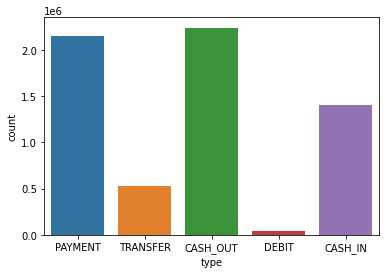

In [103]:
#type
sns.countplot(data=df,x='type')

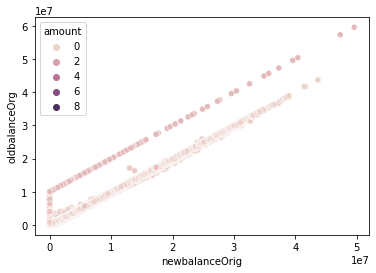

In [106]:

sns.scatterplot(x='newbalanceOrig', y= 'oldbalanceOrg', hue='amount',data=df);

Text(0, 0.5, 'amount')

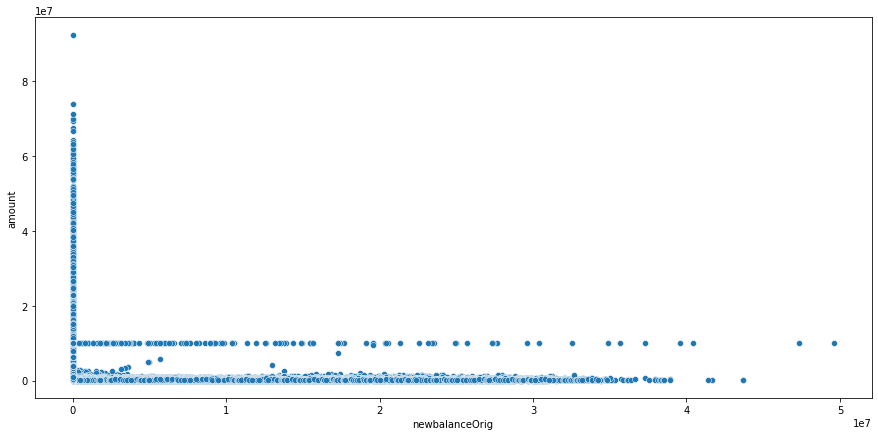

In [107]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = df["newbalanceOrig"], y = df["amount"])
plt.xlabel('newbalanceOrig')
plt.ylabel('amount')

In [108]:
type = df["isFraud"].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(df, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Distribution of Transaction Type")
figure.show()


# Converting categorical data into numerical data.

In [11]:
from sklearn.preprocessing import LabelEncoder

la=LabelEncoder()
df['type']=la.fit_transform(df['type'])

In [12]:
df['type'].value_counts()

1    2237500
3    2151495
0    1399284
4     532909
2      41432
Name: type, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(1), int64(3), object(2)
memory usage: 509.7+ MB


In [61]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

# Droppig the columns which is not required

In [14]:
df.drop(['nameOrig',"nameDest"],axis=1,inplace=True)

# Removing the outliers

In [16]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [17]:
lowFraud,uppFraud=remove_outlier(df['amount'])
df["amount"]=np.where(df['amount']>uppFraud,uppFraud,df['amount'])
df["amount"]=np.where(df['amount']<lowFraud,lowFraud,df['amount'])

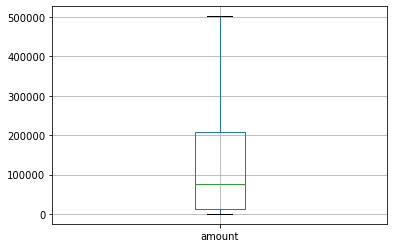

In [18]:
df.boxplot(column=["amount"])
plt.show()


In [19]:
lowFraud,uppFraud=remove_outlier(df['oldbalanceOrg'])
df["oldbalanceOrg"]=np.where(df['oldbalanceOrg']>uppFraud,uppFraud,df['oldbalanceOrg'])
df["oldbalanceOrg"]=np.where(df['oldbalanceOrg']<lowFraud,lowFraud,df['oldbalanceOrg'])

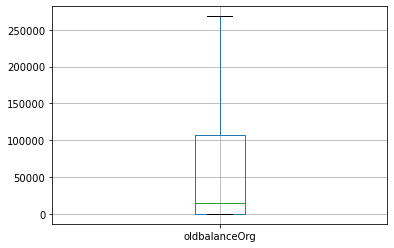

In [20]:
df.boxplot(column=["oldbalanceOrg"])
plt.show()


In [21]:
lowFraud,uppFraud=remove_outlier(df['newbalanceOrig'])
df["newbalanceOrig"]=np.where(df['newbalanceOrig']>uppFraud,uppFraud,df['newbalanceOrig'])
df["newbalanceOrig"]=np.where(df['newbalanceOrig']<lowFraud,lowFraud,df['newbalanceOrig'])

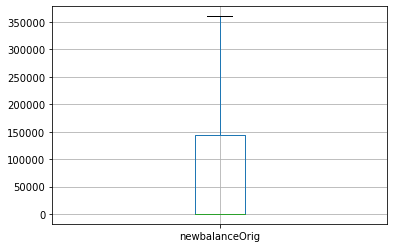

In [22]:
df.boxplot(column=["newbalanceOrig"])
plt.show()


In [23]:
lowFraud,uppFraud=remove_outlier(df['newbalanceDest'])
df["newbalanceDest"]=np.where(df['newbalanceDest']>uppFraud,uppFraud,df['newbalanceDest'])
df["newbalanceDest"]=np.where(df['newbalanceDest']<lowFraud,lowFraud,df['newbalanceDest'])

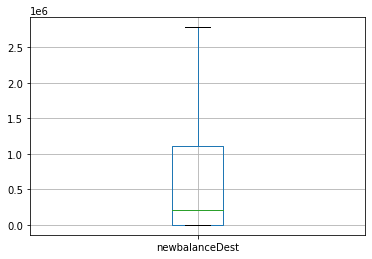

In [24]:
df.boxplot(column=["newbalanceDest"])
plt.show()

In [25]:
lowFraud,uppFraud=remove_outlier(df['oldbalanceDest'])
df["oldbalanceDest"]=np.where(df['oldbalanceDest']>uppFraud,uppFraud,df['oldbalanceDest'])
df["oldbalanceDest"]=np.where(df['oldbalanceDest']<lowFraud,lowFraud,df['oldbalanceDest'])

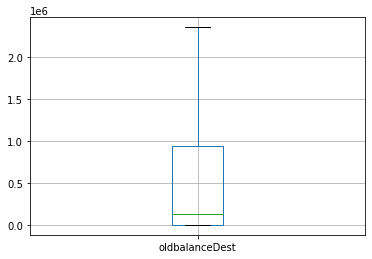

In [26]:
df.boxplot(column=["oldbalanceDest"])
plt.show()

# Logistic regression

In [27]:
x=df.drop(['isFraud'],axis=1)
y=df[['isFraud']]

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.5,test_size=0.3,random_state=1)

In [29]:
reg=LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [30]:
reg.score(x_train,y_train)

0.9977044047892221

In [31]:
reg.score(x_test,y_test)

0.9977126823017353

# DecisionTree model

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
a = DecisionTreeClassifier()

In [34]:
a.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
a.score(x_train,y_train)

0.9999959136330631

In [36]:
a.score(x_test,y_test)

0.9995541668893213

# Naive Bays Model

In [37]:
from sklearn.naive_bayes import GaussianNB
a_model=GaussianNB()
a_model.fit(x_train,y_train)

GaussianNB()

In [38]:
a_model.score(x_train,y_train)

0.9988284700327852

In [39]:
a_model.score(x_test,y_test)

0.9987966173264053

# XgBoost Model

In [40]:
from xgboost import XGBClassifier

In [41]:
d = XGBClassifier(n_estimators=20,max_depth=3)

In [42]:
d.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=20, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [43]:
d.score(x_train,y_train)


0.9993757288664104

In [133]:
d.score(x_test,y_test)

0.9993587547268263

# Sampling

# RandomUnderSampler

In [46]:
from imblearn.under_sampling import RandomUnderSampler

In [47]:
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(x, y)

print('original dataset shape:', (y).value_counts())
print('Resample dataset shape', (y_rus).value_counts())

original dataset shape: isFraud
0          6354407
1             8213
dtype: int64
Resample dataset shape isFraud
0          8213
1          8213
dtype: int64


In [48]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler



# NearMiss 

In [49]:
from imblearn.under_sampling import NearMiss 
print('Original dataset shape %s',(y).value_counts())
nm = NearMiss()
x_res, y_res = nm.fit_resample(x, y)
print('Resampled dataset shape %s',(y_res).value_counts())

Original dataset shape %s isFraud
0          6354407
1             8213
dtype: int64
Resampled dataset shape %s isFraud
0          8213
1          8213
dtype: int64


In [50]:
a=LogisticRegression()

In [51]:
a.fit(x_train,y_train)

LogisticRegression()

In [52]:
a.score(x_train,y_train)

0.9977044047892221

In [53]:
a.score(x_test,y_test)

0.9977126823017353

In [54]:
b = DecisionTreeClassifier()

In [55]:
b.fit(x_train,y_train)

DecisionTreeClassifier()

In [56]:
b.score(x_train,y_train)

0.9999959136330631

In [57]:
b.score(x_test,y_test)

0.9995499757437449

# Cross validation

In [58]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
print("Size of Dataset {}".format(len(x)))
logreg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
logreg.fit(x_train,y_train)
predict=logreg.predict(x_test)
print("Accuracy score on training set is {}".format(accuracy_score(logreg.predict(x_train),y_train)))
print("Accuracy score on test set is {}".format(accuracy_score(predict,y_test)))

Size of Dataset 6362620
Accuracy score on training set is 0.9976566257296523
Accuracy score on test set is 0.9977572132234834


# Data standardization with  sklearn

In [63]:

from sklearn.preprocessing import StandardScaler

# copy of datasets
x_train_stand = x_train.copy()
x_test_stand = x_test.copy()

# numerical features
num_cols = ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(x_train_stand[[i]])
    
    # transform the training data column
    x_train_stand[i] = scale.transform(x_train_stand[[i]])
    
    # transform the testing data column
    x_test_stand[i] = scale.transform(x_test_stand[[i]])

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
rf=LogisticRegression()

In [66]:
rf.fit(x_train_stand,y_train)

LogisticRegression()

In [115]:
rf.score(x_train_stand,y_train)

0.9988582870398852

In [116]:
rf.score(x_test_stand,y_test)

0.9988600084032468

In [117]:
from sklearn.tree import DecisionTreeClassifier

In [118]:
dt = DecisionTreeClassifier()

In [119]:
dt.fit(x_train_stand,y_train)

DecisionTreeClassifier()

In [120]:
dt.score(x_train_stand,y_train)

0.9999939378072914

In [73]:
dt.score(x_test_stand,y_test)

0.0019080190236097708

In [122]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train_stand,y_train)

GaussianNB()

In [123]:
nb.score(x_train_stand,y_train)

0.9987047114912679

In [124]:
nb.score(x_test_stand,y_test)

0.9987279873175935

# Data normalization with sklearn

In [78]:

from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train_norm = norm.transform(x_train)

# transform testing dataabs
x_test_norm = norm.transform(x_test)

In [111]:
from sklearn.linear_model import LogisticRegression 

In [112]:
reg.fit(x_train_norm,y_train)

LogisticRegression()

In [113]:
reg.score(x_train_norm,y_train)

0.9988594096681646

In [114]:
reg.score(x_test_norm,y_test)

0.9988584367236558

In [125]:
from sklearn.tree import DecisionTreeClassifier

In [126]:
dt = DecisionTreeClassifier()

In [127]:
dt.fit(x_train_norm,y_train)

DecisionTreeClassifier()

In [128]:
dt.score(x_train_norm,y_train)

0.9999939378072914

In [129]:
dt.score(x_test_norm,y_test)

0.9995793137627791

In [130]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train_norm,y_train)

GaussianNB()

In [131]:
nb.score(x_train_norm,y_train)

0.9987047114912679

In [132]:
nb.score(x_test_norm,y_test)

0.9987279873175935